In [94]:
# 라지 마진 분류
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, (2, 3)]
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [96]:
svm_clf.intercept_

array([-3.78823471])

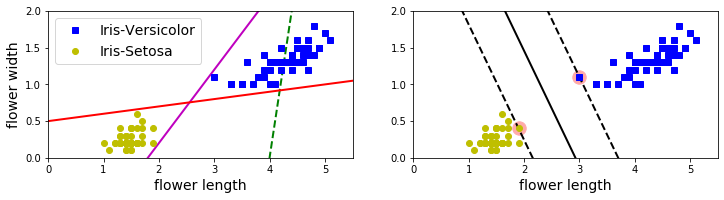

In [97]:
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 결정 경계에서 w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")

plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")

plt.xlabel("flower length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

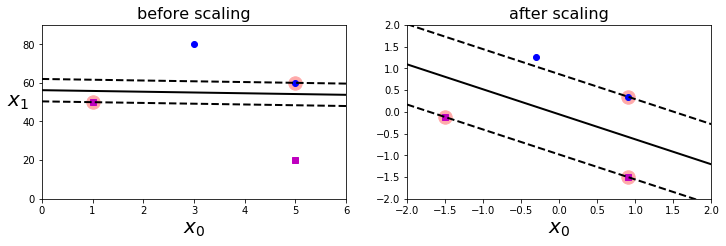

In [98]:
# 특성의 스케일에 민감함
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100) # 하이퍼파라미터 C
# C가 클수록 마진은 좁아지지만 마진 오류는 적어짐
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20, rotation=0)

plt.title('before scaling', fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel('$x_0$', fontsize=20)
plt.title('after scaling', fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

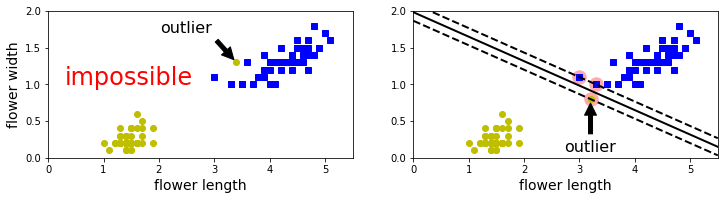

In [99]:
# 이상치에 민감함
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12, 2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")

plt.text(0.3, 1.0, "impossible", fontsize=24, color="red")
plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)

plt.annotate("outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("flower length", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

In [100]:
# 라지 마진 vs 마진 오류
# 붓꽃 데이터셋 적재, 특성 스케일 변경, 선형 SVM 모델
# LinearSVM -> 힌지 손실 함수 적용
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris.data[:, (2, 3)] # petal length, petal Width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [101]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [102]:
# 여러가지 규제 설정 비교 그래프
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [103]:
# 스케일되지 않은 파라미터
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기(마진 결계 선에 영향을 주는 벡터)
# LinearSVC에는 서포트 벡터가 없음
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

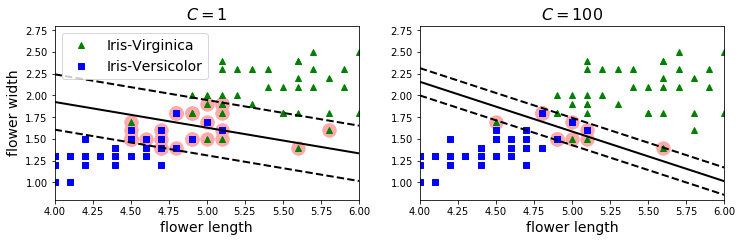

In [104]:
plt.figure(figsize=(12, 3.2))
plt.subplot(121)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")

plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("flower length", fontsize=14)
plt.ylabel("flower width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C={}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")

plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("flower length", fontsize=14)
plt.title("$C={}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

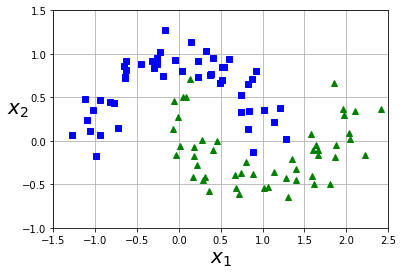

In [105]:
# 비선형 분류
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which="both")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [106]:
# 다항 특성 추가
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

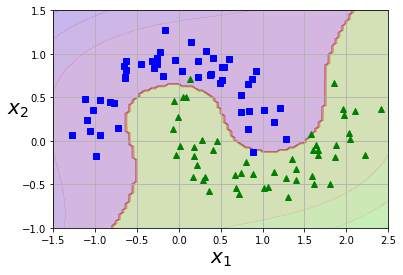

In [107]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # meshgrid: 좌표 벡터 -> 좌표 행렬
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [108]:
# 다항식 커널(커널 트릭)
# 특성을 실제로 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [109]:
poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

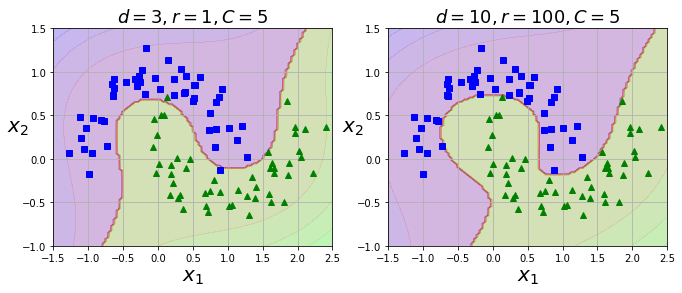

In [110]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

Text(0.5, 1.0, '$d=3, r=80, C=1000$')

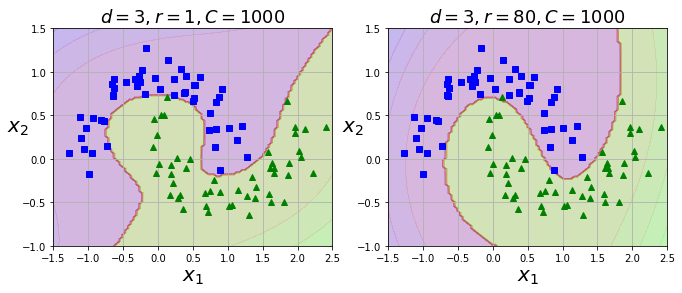

In [111]:
# 적절한 하이퍼파라미터 확인해보기
poly_kernel_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1000))
])
poly_kernel_svm_clf1.fit(X, y)

poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=80, C=1000))
])
poly_kernel_svm_clf2.fit(X, y)



plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=1000$", fontsize=18)

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=80, C=1000$", fontsize=18)

In [112]:
# 테스트셋 나누기
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [113]:
# 모델 평가 점수
class ScoreKeeper(object):
    """only holds scores, doesn't create them"""
    def __init__(self):
        self.precision = "N/A"
        self.accuracy = "N/A"
        self.recall = "N/A"
        return

    def __sub__(self, other):
        """calculates the difference between the three scores

        Args:
         other (Scores): the right-hand side of the subtraction

        Returns:
         ScoreKeeper: object with the differences

        Raises:
         TypeError: one of the values wasn't set on one of the Scores
        """
        scores = ScoreKeeper()
        scores.accuracy = self.accuracy - other.accuracy
        scores.precision = self.precision - other.precision
        scores.recall = self.recall - other.recall
        return scores

    def __gt__(self, other):
        """compares scores

        Args:
         other (Scores): object to compare to

        Returns:
         bool: True if all three scores are greater than other's

        Raises:
         TypeError: one of the values wasn't set
        """
        return all((self.accuracy > other.accuracy,
                    self.precision > other.precision,
                    self.recall > other.recall))

    def __str__(self):
        return "Precision: {0:.2f}, Accuracy: {1:.2f}, Recall: {2:.2f}".format(
            self.precision,
            self.accuracy,
            self.recall)
    
class Scores(ScoreKeeper):
    def __init__(self, model, x_test, y_test):
        """  model: model that has been fit to the data
             x_test: input for accuracy measurement
             y_test: labels for scoring the model
        """
        self.x_test = x_test
        self.y_test = y_test
        self._accuracy = None
        self._recall = None
        self._precision = None
        self.model = model
        self._predictions = None
        self._scores = None
        return

    @property
    def predictions(self):
        """the model's predictions

        Returns:
         array: predictions for x-test
        """
        if self._predictions is None:
            self._predictions = self.model.predict(self.x_test)
        return self._predictions

    @property
    def accuracy(self):
        """the accuracy of the model's predictions

        the fraction that was correctly predicted

        (tp + tn)/(tp + tn + fp + fn)

        Returns:
         float: accuracy of predictions for x-test
        """
        if self._accuracy is None:
            self._accuracy = self.model.score(self.x_test, self.y_test)
        return self._accuracy

    @property
    def recall(self):
        """the recall score for the predictions

        The fraction of true-positives penalized for missing any
        This is the better metric when missing a case is more costly
        than accidentally identifying a case.

        tp / (tp + fn)

        Returns:
         float: recall of the predictions
        """
        if self._recall is None:
            self._recall = recall_score(self.y_test, self.predictions)
        return self._recall

    @property
    def precision(self):
        """the precision of the test predictions

        The fraction of true-positives penalized for false-positives
        This is the better metric when accidentally identifying a case
        is more costly than missing a case

        tp / (tp + fp)

        Returns:
         float: precision score
        """
        if self._precision is None:
            self._precision = precision_score(self.y_test, self.predictions)
        return self._precision

In [114]:
# 그리드 탐색
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# 각 커널에 해당되는 파라미터 범위
values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]


param_grid = {'C': values, 'gamma': values}


# grid_search = GridSearchCV(pipe, param_grid)
# 표준화 파이프라인으로 만든 svc 모델
svc = SVC()

# scoring: Classification일 경우, 'accuracy', 'f1', ...
# scoring: Regression일 경우, 'neg_mean_squared_error', 'r2', ...
# scoring = {'acc': 'accuracy', 'prec': 'precision'}
grid_search = GridSearchCV(estimator=svc,    # 모델
                           param_grid=param_grid, # 찾고자하는 파라미터(dict 형식)
                           scoring='accuracy', 
                           cv=10,                 # cv = KFold: 교차검증 횟수
                           n_jobs=4)              # n_jonbs: 병렬처리 개수

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [115]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9875
{'C': 10.0, 'gamma': 1.0}


In [116]:
import pandas as pd
import mglearn

# df = pd.DataFrame(grid_search.cv_results_)
# print(df)
# print(df.sort_values(by='param_max_features'))
# print(df.sort_values(by='param_max_features', ascending=0))
# print(df.sort_values(by='rank_test_score'))

score = grid_search.score(X_test, y_test)
print(score)

cvres = grid_search.cv_results_
results = pd.DataFrame(cvres)

1.0


In [117]:
grid_search.best_estimator_

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

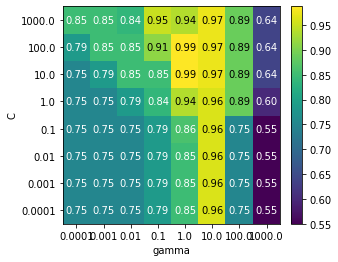

In [118]:
# 검색 결과를 heatmap으로 시각화
# heatmap으로 시각화하려면 각 parameter를 축으로 하는 numpy 배열을 만들어야 함
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar의 크기를 정하기 위한 축 library

# 차원 변형
mean_score = results['mean_test_score'].values.reshape(8, 8)

# 시각화
score_image = mglearn.tools.heatmap(mean_score, 
                                    xlabel='gamma',
                                    xticklabels=param_grid['gamma'],
                                    ylabel='C',
                                    yticklabels=param_grid['C'])

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad='5%')
plt.colorbar(score_image, cax=cax)
plt.show()

In [119]:
grid_search.best_params_

{'C': 10.0, 'gamma': 1.0}

In [120]:
grid_search.best_estimator_

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [121]:
import numpy as np

def nested_cv(x, y, inner_cv, outer_cv, Classifier, parameter_grid):

    outer_scores = []

    for train_samples, test_samples in outer_cv.split(x, y):
        best_params = {}
        best_score = -np.inf

        for parameters in parameter_grid:
            cv_scores = []

            for inner_train, inner_test in inner_cv.split(x[train_samples], y[train_samples]):

                clf = Classifier(**parameters) # **kwargs:
                clf.fit(x[inner_train], y[inner_train])

                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)

            mean_score = np.mean(cv_scores)

            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters

        clf = Classifier(**best_params)
        clf.fit(x[train_samples], y[train_samples])
        
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))

    return np.array(outer_scores)

# library import
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(X, y, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차 검증 점수 ==> {}'.format(scores))
print('교차 검증 평균 점수 ==> {:.3f}'.format(scores.mean()))

교차 검증 점수 ==> [0.95 1.   0.95 1.   0.95]
교차 검증 평균 점수 ==> 0.970


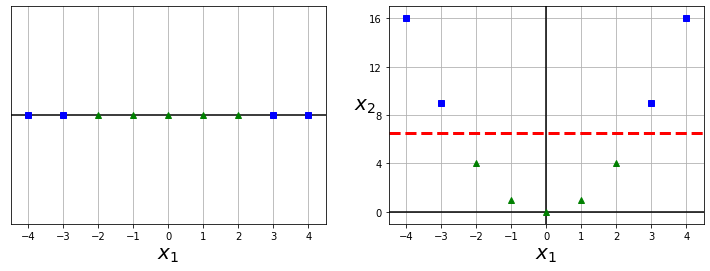

In [122]:
# 비선형 특성의 유사도 특성 추가 - 가우시안 RBF
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

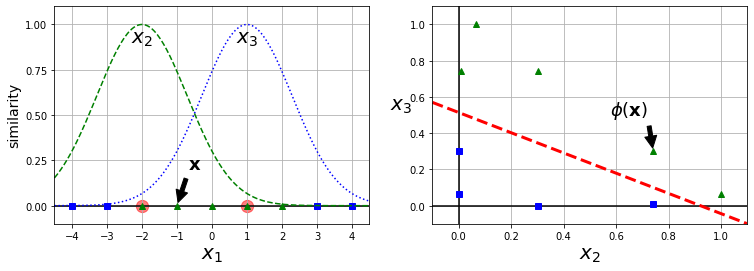

In [133]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [134]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [135]:
# SVC 모델에서 가우시안 RBF 커널

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

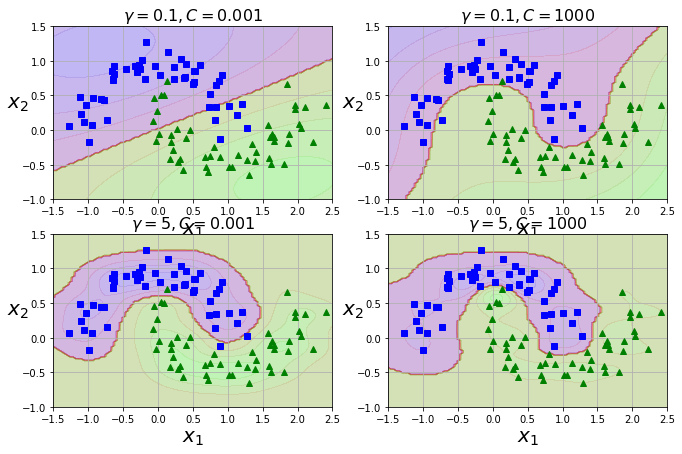

In [136]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X_train, y_train)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

In [137]:
# 회귀
# SVM 외귀는 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습
# 도로의 폭은 하이퍼파라미터 epsilon으로 조절

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [139]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [140]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

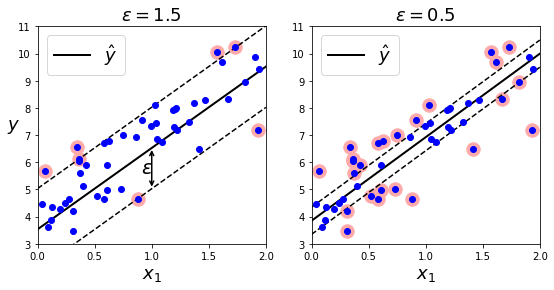

In [144]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [147]:
# 비선형 회귀 작업 -> SVM의 커널 이용
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() # 2차원

In [148]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [149]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", gamma='auto', degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

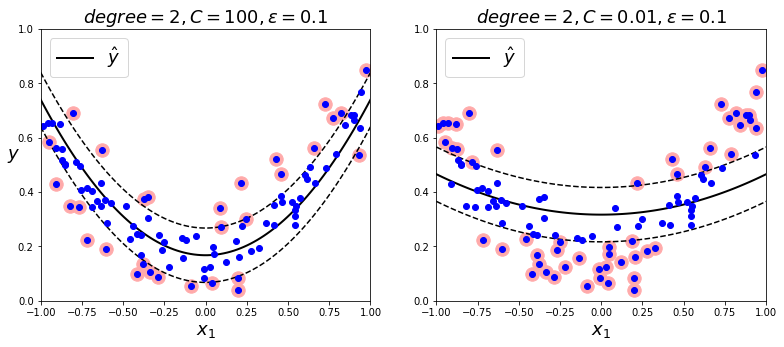

In [159]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

In [247]:
# 배치 경사 하강법을 이용한 선형 SVM 분류기(사이킷런에서는 제공 안해주므로)

# iris 데이터
iris = datasets.load_iris()

X = iris.data[:, (2, 3)] # 꽃잎의 길이, 너비
y = (iris.target == 2).astype(np.float64).reshape(-1, 1) # 타겟은 Iris-Viginica

# print(iris.DESCR)
data_df = pd.DataFrame(X, columns=['petal length', 'petal width'])

# target data
# 0: Setosa, 1: Versicolor, 2: Virginica
target_df = pd.DataFrame(y, columns=['target'])

In [248]:
iris_df = pd.concat([data_df, target_df], axis=1)
iris_df

,petal length,petal width,target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,1.0
146,5.0,1.9,1.0
147,5.2,2.0,1.0
148,5.4,2.3,1.0


In [251]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null float64
dtypes: float64(3)
memory usage: 3.6 KB


In [253]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d
        
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
    
    def fit(self, X, y):
        if self.random_state:
            np.random.seed(self.random_state)
        
        w = np.random.randn(X.shape[1], 1)
        b = 0
        
        m = len(X)
        t = y * 2 - 1
        X_t = X * t
        self.Js = []
        
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)
            
            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
            
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        
        return self
    
    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]
    
    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)
    
C = 2
svm_clf = MyLinearSVC(C=C, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[1.],
       [0.]])

[0, 60000, 0, 100]

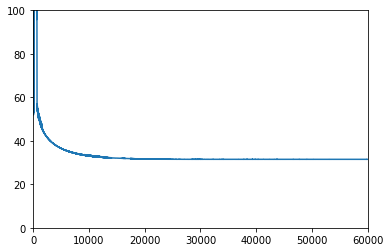

In [254]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

In [255]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


In [256]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())
print(svm_clf2.intercept_, svm_clf2.coef_)

[-15.51721253] [[2.27128546 2.71287145]]


[4, 6, 0.8, 2.8]

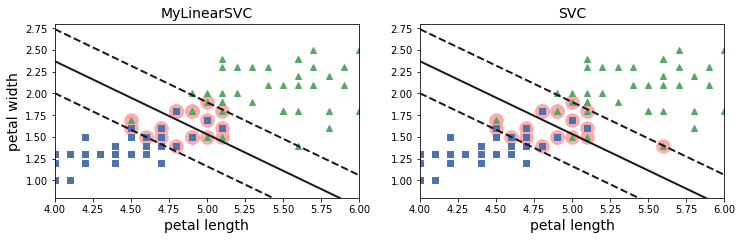

In [257]:
yr = y.ravel()
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

[-12.52988101   1.94162342   1.84544824]


[4, 6, 0.8, 2.8]

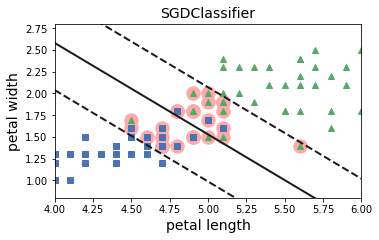

In [260]:
# 확률적 경사 하강법(SGDClassifier)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, tol=1e-3, max_iter=50, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # -1 if t==0, +1 if t==1

X_b = np.c_[np.ones((m, 1)), X]  # 편향 x0=1을 추가
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)

support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

In [391]:
# 연습문제 1. 선형적으로 분리되는 데이터셋에 LinearSVC, SVC, SGDClassifier 훈련

In [412]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [413]:
# 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [414]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 0.1
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", 
                        learning_rate="constant",
                        eta0=0.001, # 학습속도 n
                        tol=1e-3, 
                        alpha=alpha,
                        max_iter=100000,
                        random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

lin_clf.fit(X_scaled, y_train)
svm_clf.fit(X_scaled, y_train)
sgd_clf.fit(X_scaled, y_train)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.16] [[0.77 0.61]]
SVC:                          [0.16] [[0.77 0.61]]
SGDClassifier(alpha=0.10000): [0.1] [[0.69 0.64]]


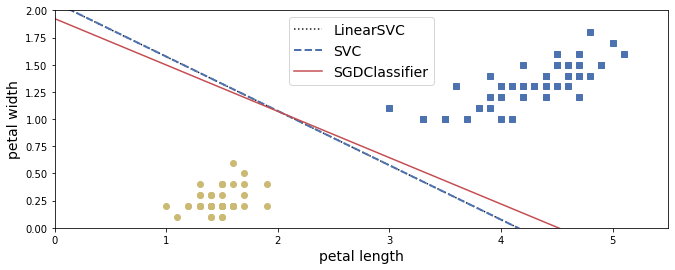

In [415]:
# 각 결정 경계의 기울기와 편향 계산
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]

w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]

w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환합니다
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그립니다
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [463]:
# 학습 성능
# SGD 최적화 방법은 그레디언트가 아니라 그레디언트의 기댓값의 추정치를 이용한다.
# 그레디언트의 기댓값의 추정치는 표본 평균이다. 즉 모든 학습용 데이터를 다 사용하여 그레디언트를 구하는 것이 아니라 
# 미니배치(minibatch)라고 부르는 일부의 데이터만 사용하여 그레디언트 추정치를 구한다. 
# 따라서 한번의 계산량이 많거나 학습데이터가 많은 딥러닝(deep learning)에 사용된다. 
# 퍼셉트론은 오분류된(mis-classified) 데이터만 이용하는 SGD의 일종이다.
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf

# 붓꽃 데이터
iris = datasets.load_iris()
X = iris["data"]  # petal length, petal width
y = iris["target"]
class_names = iris.target_names

# 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 그리드 탐색을 통한 파라미터 추정
sgd_grid = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'max_iter': [100000],
    'learning_rate': ['constant'],
    'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}

svm_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

# 교차 검증을 위해
kfold = KFold(n_splits=10, shuffle=True, random_state=0) # stratified cross-validation

# 모델 선택
sgd_clf = SGDClassifier()
svm_clf = SVC()

# 파라미터 추정
sgd_grid_search = GridSearchCV(sgd_clf, sgd_grid, cv=kfold)
svm_grid_search = GridSearchCV(svm_clf, svm_grid, cv=kfold)

sgd_grid_search.fit(X_train, y_train)
svm_grid_search.fit(X_train, y_train)

# 결과
print('SGDClassifier 최적 매개변수 점수 ==> {:.3f}'.format(sgd_grid_search.best_score_))
print('SGDClassifier 최적 매개변수 ==> {}'.format(sgd_grid_search.best_params_))
print('SGDClassifier 최적 매개변수의 테스트 점수 ==> {:.3f}'.format(sgd_grid_search.score(X_test, y_test)))
print('SGDClassifier 최적 측정기 ==> {}'.format(sgd_grid_search.best_estimator_))
print('\n')
print('SVM 최적 매개변수 점수 ==> {:.3f}'.format(svm_grid_search.best_score_))
print('SVM 최적 매개변수 ==> {}'.format(svm_grid_search.best_params_))
print('SVM 최적 매개변수의 테스트 점수 ==> {:.3f}'.format(svm_grid_search.score(X_test, y_test)))
print('SVM 최적 측정기 ==> {}'.format(svm_grid_search.best_estimator_))

SGDClassifier 최적 매개변수 점수 ==> 0.925
SGDClassifier 최적 매개변수 ==> {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'log', 'max_iter': 100000, 'penalty': 'l1'}
SGDClassifier 최적 매개변수의 테스트 점수 ==> 0.833
SGDClassifier 최적 측정기 ==> SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


SVM 최적 매개변수 점수 ==> 0.975
SVM 최적 매개변수 ==> {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
SVM 최적 매개변수의 테스트 점수 ==> 1.000
SVM 최적 측정기 ==> SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=Non

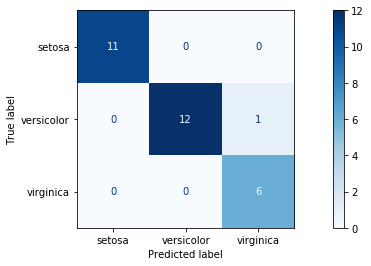

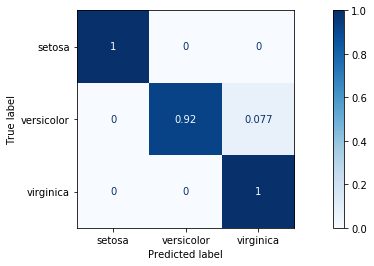

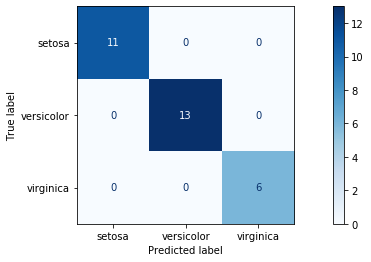

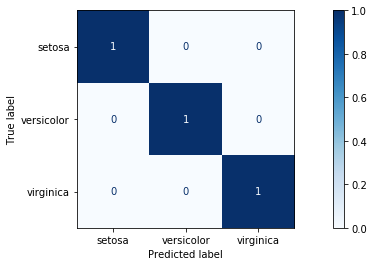

In [464]:
# 최적의 파라미터로 다시 모델 선택
opt_sgd_clf = SGDClassifier(alpha=0.0001, 
                            eta0=0.01, 
                            learning_rate='constant', 
                            loss='log', 
                            max_iter=100000, 
                            penalty='l1')

opt_svm_clf = SVC(kernel='linear',
                  C=10,
                  gamma=0.001)

opt_sgd_clf.fit(X_train, y_train)
opt_svm_clf.fit(X_train, y_train)

np.set_printoptions(precision=2)
disp1 = plot_confusion_matrix(opt_sgd_clf, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues,
                              normalize=None)

normalize_disp1 = plot_confusion_matrix(opt_sgd_clf, X_test, y_test,
                                        display_labels=class_names,
                                        cmap=plt.cm.Blues,
                                        normalize='true')

disp2 = plot_confusion_matrix(opt_svm_clf, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues,
                              normalize=None)

normalize_disp2 = plot_confusion_matrix(opt_svm_clf, X_test, y_test,
                                        display_labels=class_names,
                                        cmap=plt.cm.Blues,
                                        normalize='true')

plt.show()

In [468]:
# 수치로 보는 성능 평가
from sklearn.model_selection import cross_val_score

print('SGDClassifier accuracy score: {}'.format(cross_val_score(opt_sgd_clf, X_test, y_test, cv=3, scoring="accuracy")))
print('SGDClassifier f1 score: {}'.format(cross_val_score(opt_sgd_clf, X_test, y_test, cv=3, scoring="f1_macro")))

print('SVM accuracy score: {}'.format(cross_val_score(opt_svm_clf, X_test, y_test, cv=3, scoring="accuracy")))
print('SVM f1 score: {}'.format(cross_val_score(opt_svm_clf, X_test, y_test, cv=3, scoring="f1_macro")))

SGDClassifier accuracy score: [0.8 0.8 0.8]
SGDClassifier f1 score: [0.61 0.6  0.85]
SVM accuracy score: [1.  1.  0.9]
SVM f1 score: [1.   1.   0.85]


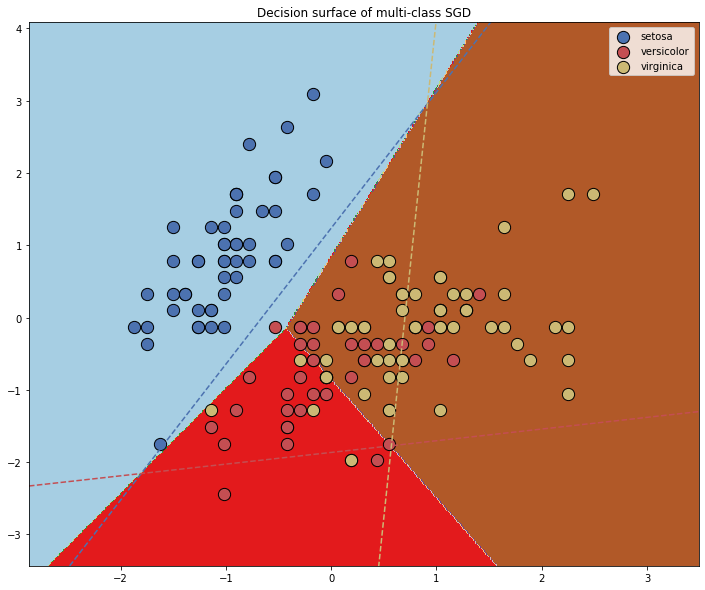

In [469]:
# + Plot multi-class SGD on the iris dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

plt.figure(figsize=(12, 10))

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
colors = "bry"

# shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # step size in the mesh

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# Plot also the training points
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=150)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

In [4]:
# 연습문제 2. MNIST 데이터셋에 SVM 분류기 훈련
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [5]:
# 훈련 샘플 섞기
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_train = X_train[rnd_idx]
y_train = y_train[rnd_idx]

In [6]:
# 모델 선택
# 선형 SVM 분류기
lin_clf = LinearSVC(max_iter=1000, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [7]:
# 훈련 세트에 대한 예측으로 정확도 측정
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8827333333333334

In [8]:
# 데이터의 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [9]:
lin_clf = LinearSVC(max_iter=1000, random_state=42)
lin_clf.fit(X_train_scaled, y_train)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [10]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9227666666666666

In [12]:
# 정확성이 높아졌지만 MNIST에서는 좋은 성능이 아님 -> SVM의 RBF 커널 적용
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', decision_function_shape='ovr')
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

In [14]:
# 60,000개의 데이터 중 10,000개로만 훈련을 시켰지만 좋은 성능을 얻음
# 교차 검증을 사용한 랜덤 서치로 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, cv=3, n_iter=10, verbose=2, n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD83E45588>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CDBE8E4E48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [15]:
rnd_search_cv.best_estimator_

SVC(C=8.852316058423087, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001766074650481071, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [16]:
rnd_search_cv.best_score_

0.8630037222851593

In [17]:
# 전체 데이터셋으로 최선의 모델을 재훈련
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.852316058423087, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001766074650481071, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [18]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.99965

In [19]:
# 정확도가 매우 높음! -> 모델 선택 -> 테스트셋으로 모델 테스트
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9709